<a href="https://colab.research.google.com/github/bidishaaiml/COE_week8/blob/main/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [623]:
#importing all the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [624]:
import warnings
warnings.filterwarnings("ignore")

### **Loading the Dataset**

In [625]:
df=pd.read_csv('/content/Training Dataset.csv') #loading the training dataset
test=pd.read_csv('/content/Test Dataset.csv') #loading the test dataset

### **Peek at the Data**

In [626]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [627]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### **Information about the Data**

In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Inference: There are object, int and float data types columns and there are null values and 614 entries and 13 columns.

### **Statistical Summary**

In [629]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### **Finding Unique Values**

In [630]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [631]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [632]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

# **Checking For Missing values**

In [633]:
#checking for the number of null values in the columns
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [634]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# **Handling the Missing Values**

In [635]:
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed']:    # FOR CATEGORICAL COLUMNS USING MODE TO REMOVE NULL
    df[column].fillna(df[column].mode()[0], inplace=True)

for column in ['Gender', 'Married', 'Dependents', 'Self_Employed']:    # FOR CATEGORICAL COLUMNS USING MODE TO REMOVE NULL
    test[column].fillna(test[column].mode()[0], inplace=True)

In [636]:
# FOR NUMERICAL COLUMNS USING MEDIAN TO REMOVE NULL
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

# FOR NUMERICAL COLUMNS USING MEDIAN TO REMOVE NULL
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(), inplace=True)
test['Credit_History'].fillna(test['Credit_History'].median(), inplace=True)

In [637]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Inference: All the null values in both the training dataset and testing dataset were handled.

# **Removing Unwanted Columns**

In [638]:
df.drop(['Loan_ID'],axis=1,inplace=True)
# removing the Load ID column as it does not have any significant role on determining the loan status.

# **Analyzing Features**

<Axes: xlabel='Loan_Status', ylabel='count'>

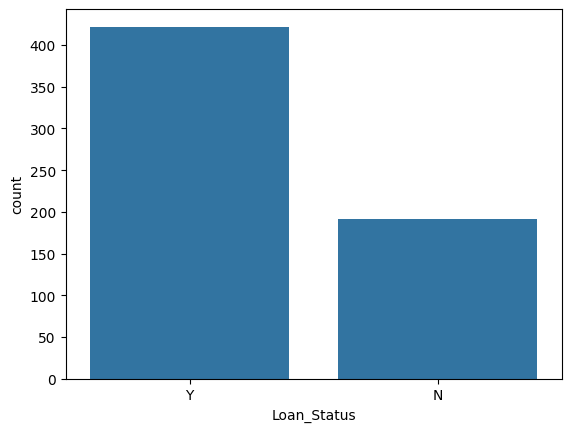

In [639]:
sns.countplot(x='Loan_Status', data=df)

Inference: There are more records of people who are approved the loan.

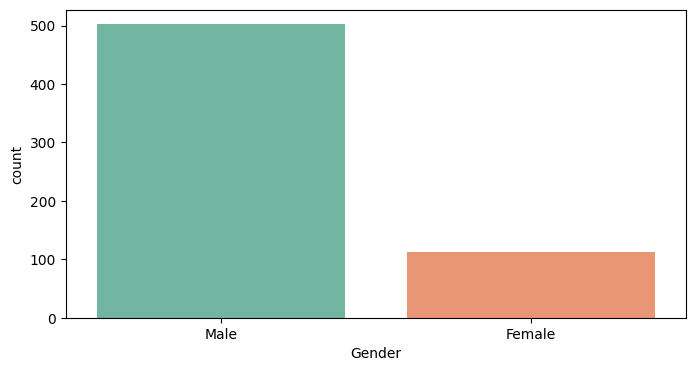

In [640]:
# Setting the figure size
plt.figure(figsize=(8, 4))

# Creating the countplot with a custom palette
sns.countplot(data=df, x='Gender', palette='Set2')

# Showing the plot
plt.show()


Inference: There are more male than female who take loans.

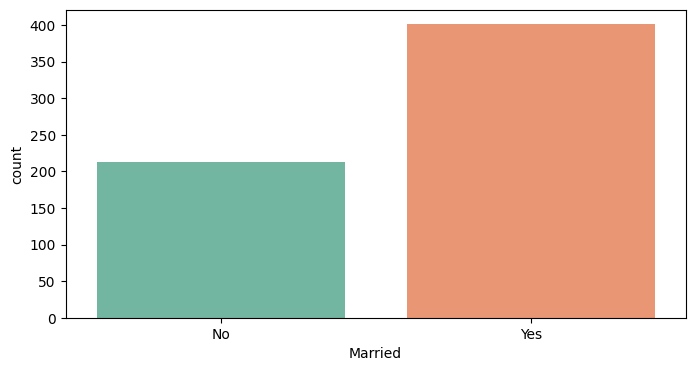

In [641]:
# Setting the figure size
plt.figure(figsize=(8, 4))

# Creating the countplot with a custom palette
sns.countplot(data=df, x='Married', palette='Set2')

# Showing the plot
plt.show()

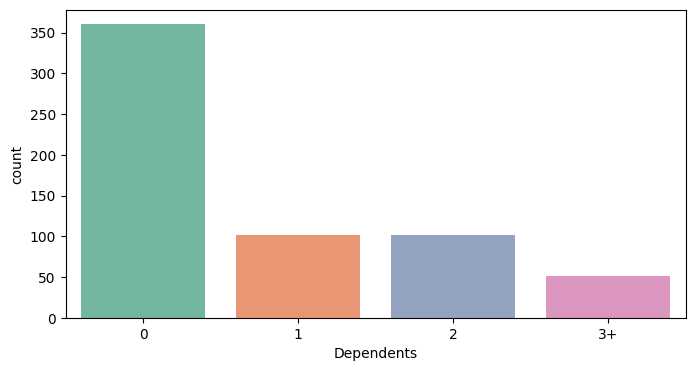

In [642]:
# Setting the figure size
plt.figure(figsize=(8, 4))

# Creating the countplot with a custom palette
sns.countplot(data=df, x='Dependents', palette='Set2')

# Showing the plot
plt.show()

Infernce: The people with no dependents take more loans.

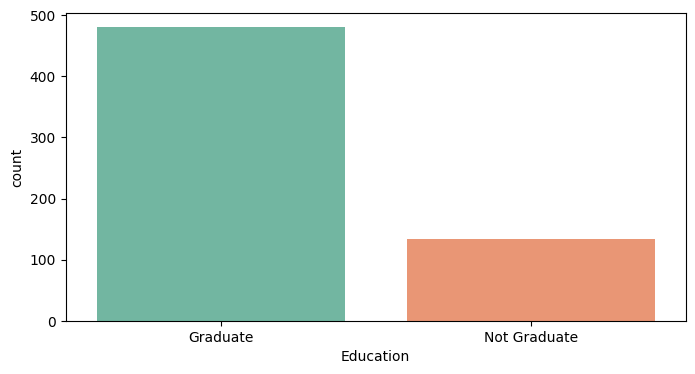

In [643]:
# Setting the figure size
plt.figure(figsize=(8, 4))

# Creating the countplot with a custom palette
sns.countplot(data=df, x='Education', palette='Set2')

# Showing the plot
plt.show()

Inference: Most of the people in the records are graduates.

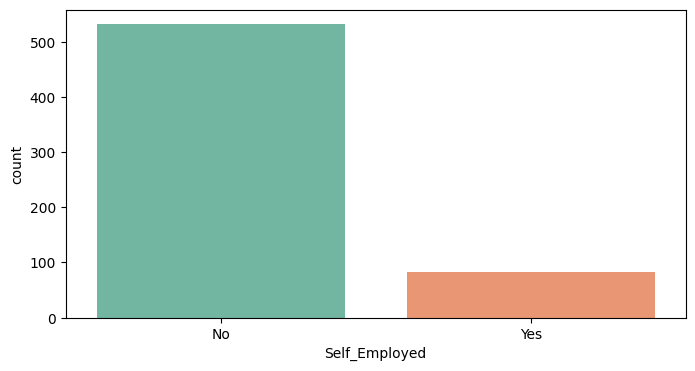

In [644]:
# Setting the figure size
plt.figure(figsize=(8, 4))

# Creating the countplot with a custom palette
sns.countplot(data=df, x='Self_Employed', palette='Set2')

# Showing the plot
plt.show()

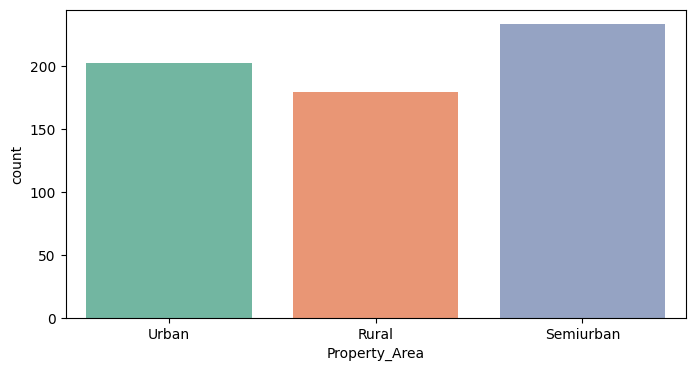

In [645]:
# Setting the figure size
plt.figure(figsize=(8, 4))

# Creating the countplot with a custom palette
sns.countplot(data=df, x='Property_Area', palette='Set2')

# Showing the plot
plt.show()

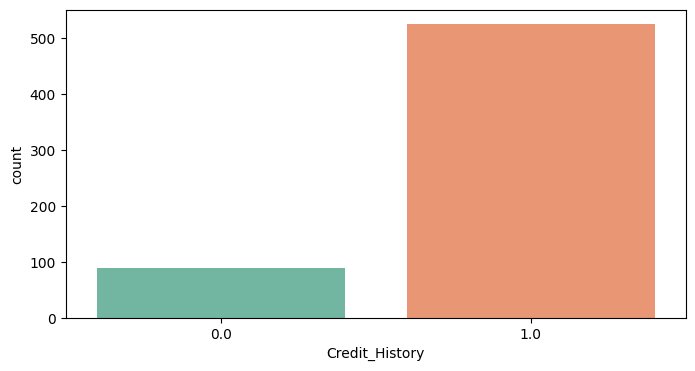

In [584]:
# Setting the figure size
plt.figure(figsize=(8, 4))

# Creating the countplot with a custom palette
sns.countplot(data=df, x='Credit_History', palette='Set2')

# Showing the plot
plt.show()

# **Applying Log Transformation**

In [585]:
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculating skewness for each numerical column
skewness = df[numerical_cols].apply(lambda x: x.skew())

# Identifying columns with skewness greater than a threshold(here 0.5)
skewed_cols = skewness[skewness > 0.5].index

# Applying log transformation to skewed columns
df[skewed_cols] = np.log1p(df[skewed_cols])

# Checking skewness again to verify
skewness_after = df[skewed_cols].apply(lambda x: x.skew())

print("Original Skewness:")
print(skewness)

print("\nSkewness after Log Transformation:")
print(skewness_after)


Original Skewness:
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

Skewness after Log Transformation:
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
dtype: float64


In [586]:
numerical_cols = test.select_dtypes(include=np.number).columns

# Calculating skewness for each numerical column
skewness = test[numerical_cols].apply(lambda x: x.skew())

# Identifying columns with skewness greater than a threshold
skewed_cols = skewness[skewness > 0.5].index

# Applying log transformation to skewed columns
test[skewed_cols] = np.log1p(df[skewed_cols])

# Checking skewness again to verify
skewness_after = test[skewed_cols].apply(lambda x: x.skew())

print("Original Skewness:")
print(skewness)

print("\nSkewness after Log Transformation:")
print(skewness_after)


Original Skewness:
ApplicantIncome      8.441375
CoapplicantIncome    4.257357
LoanAmount           2.244601
Loan_Amount_Term    -2.709537
Credit_History      -1.854721
dtype: float64

Skewness after Log Transformation:
ApplicantIncome     -0.079516
CoapplicantIncome   -0.241845
LoanAmount          -0.631939
dtype: float64


# **Finding Correlation**

In [587]:
#finding correlations among the numerical columns
corr_matrix=df.corr(numeric_only=True)
corr_matrix.style.background_gradient(cmap='coolwarm')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.368258,0.492819,-0.031733,0.013482
CoapplicantIncome,-0.368258,1.000000,0.132697,0.014784,0.008274
LoanAmount,0.492819,0.132697,1.000000,0.084748,-0.018210
Loan_Amount_Term,-0.031733,0.014784,0.084748,1.000000,-0.004705
Credit_History,0.013482,0.008274,-0.018210,-0.004705,1.000000


Inference: The Applicants Income is having a strong impact on his loan amount.

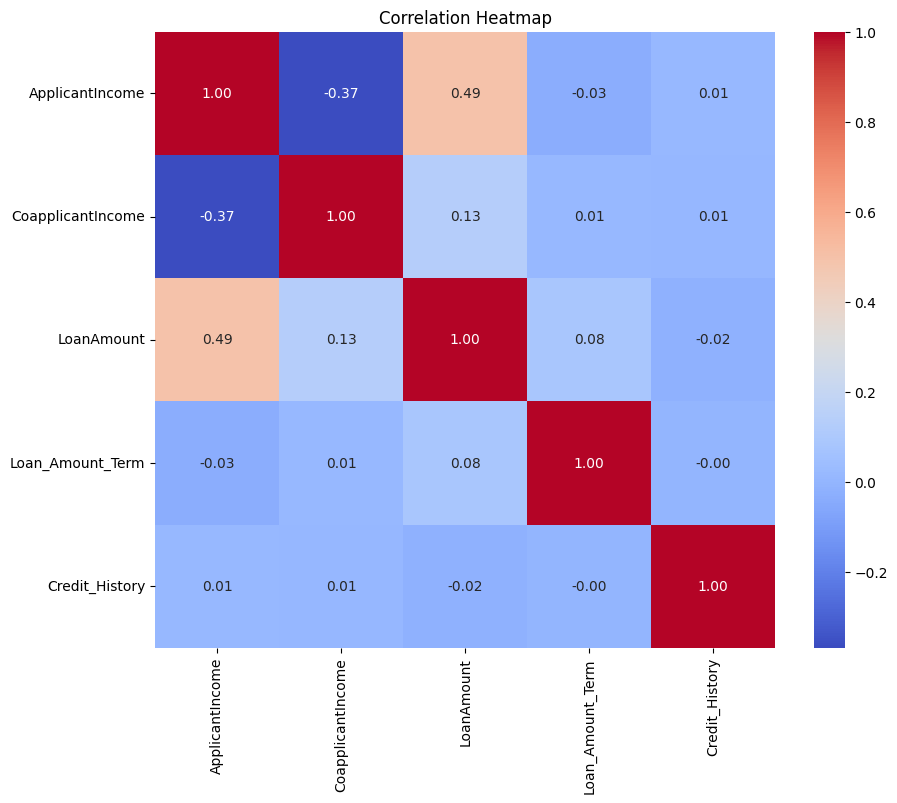

In [588]:
# Calculating the correlation matrix
corr = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### **Replacing the "Y" and "N" in target column with 1 and 0 respectively.**

In [589]:
df.Loan_Status.replace('N',0,inplace=True)
df.Loan_Status.replace('Y',1,inplace=True)

### **Finding corelation with the target column**

In [590]:
# Extracting the correlations with the target column 'Loan_Status'.
corr=df.corr(numeric_only=True)
loan_status_corr = corr['Loan_Status'].sort_values(ascending=False)
loan_status_corr

Loan_Status          1.000000
Credit_History       0.540556
CoapplicantIncome    0.060593
ApplicantIncome      0.010959
Loan_Amount_Term    -0.022549
LoanAmount          -0.038242
Name: Loan_Status, dtype: float64

# **Seperating Numerical and Categorical columns**

In [591]:
# Separating numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns_test= test.select_dtypes(include=['number']).columns.tolist()

In [592]:
# Separating categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns_test=test.select_dtypes(include=['object', 'category']).columns.tolist()

# **Outlier Handling**

In [593]:
#a generalised function to detect the outliers i.e the values beyond a particular threshold
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [594]:
#a function that check if there is any outliers
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [595]:
for col in numerical_columns:
    print(col, check_outlier(df, col))

ApplicantIncome True
CoapplicantIncome False
LoanAmount True
Loan_Amount_Term True
Credit_History True
Loan_Status False


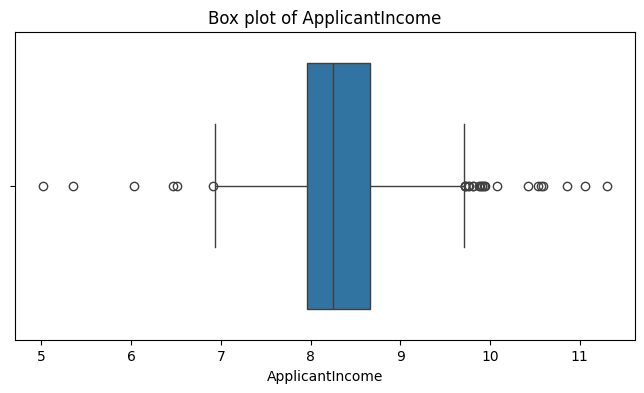

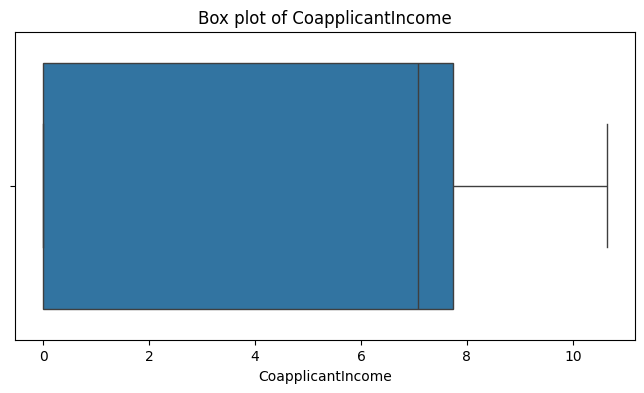

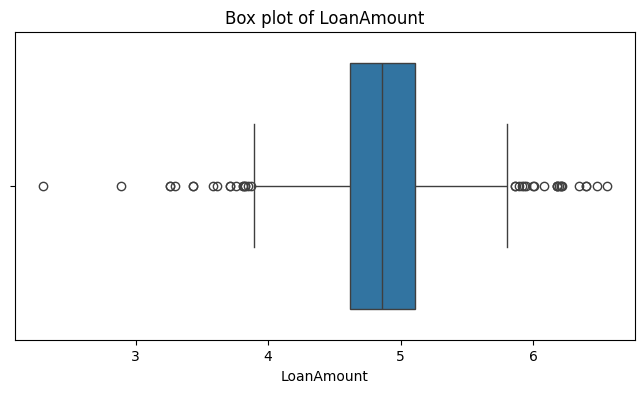

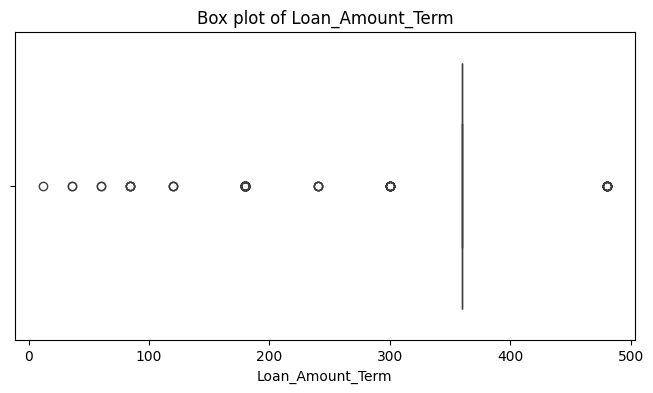

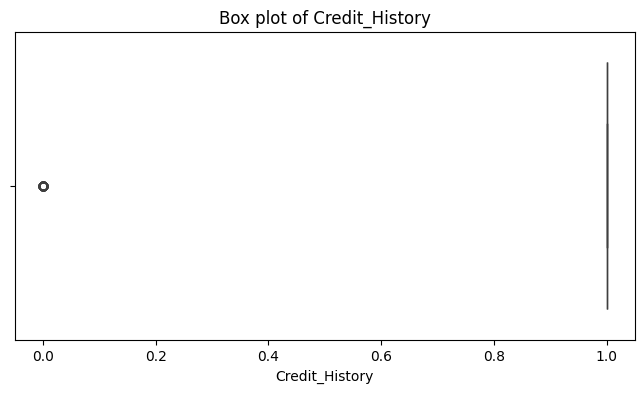

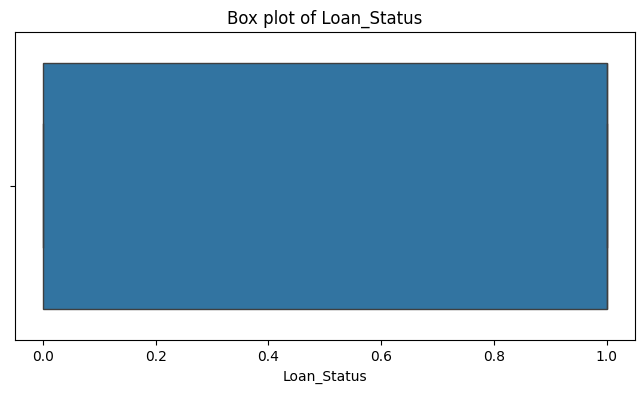

In [596]:
# Plotting box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [597]:
#a function to replace the existing outliers with the threshold values
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [598]:
#replacing these outliers with thresholds.
for col in numerical_columns:
    replace_with_thresholds(df, col)

for col in numerical_columns_test:
    replace_with_thresholds(test, col)

In [599]:
#After replacing, there are no outliers.
for col in numerical_columns:
    print(col, check_outlier(df, col))

ApplicantIncome False
CoapplicantIncome False
LoanAmount False
Loan_Amount_Term False
Credit_History False
Loan_Status False


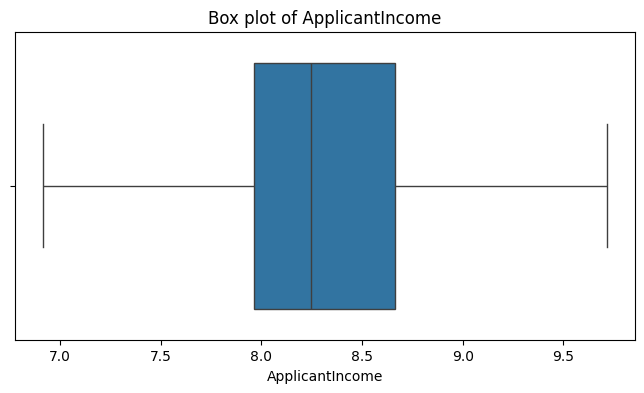

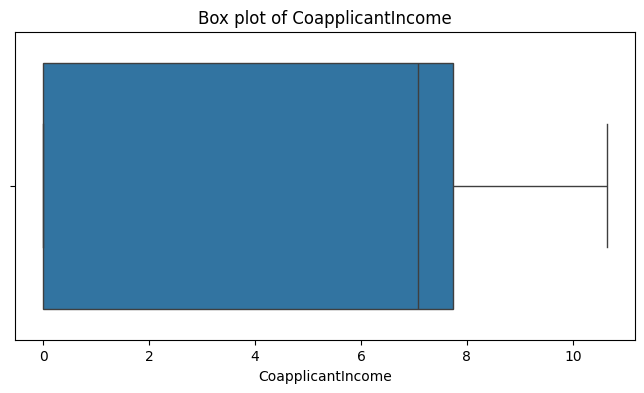

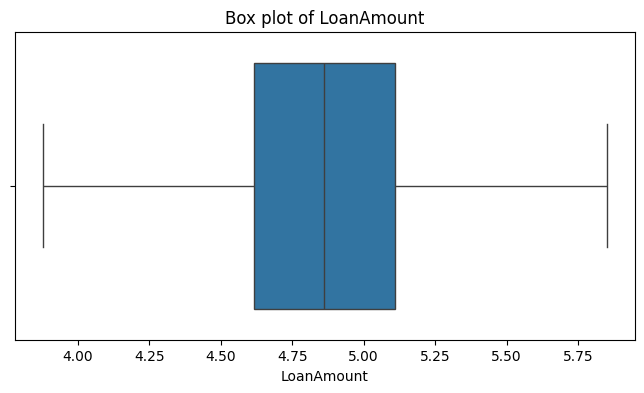

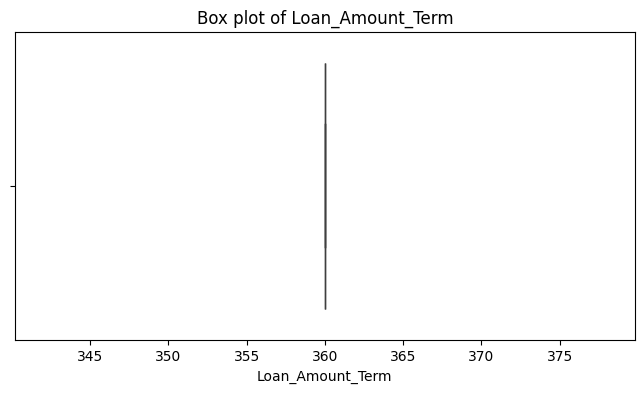

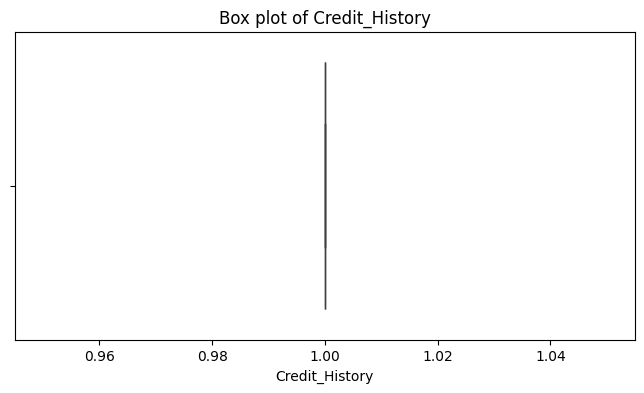

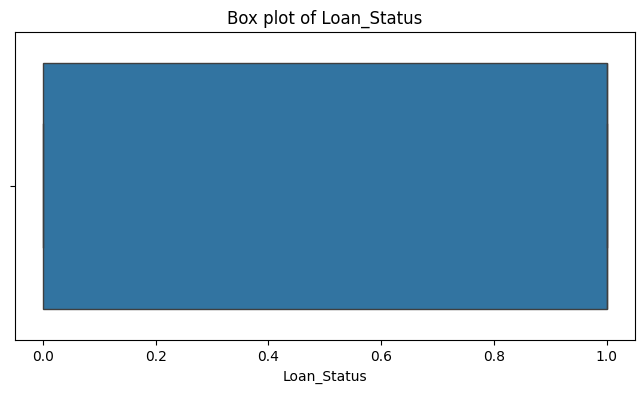

In [600]:
# Plotting box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [601]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674197,0.000000,4.859812,360.0,1.0,Urban,1.0
1,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,360.0,1.0,Rural,0.0
2,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,360.0,1.0,Urban,1.0
3,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,360.0,1.0,Urban,1.0
4,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,360.0,1.0,Urban,1.0


Inference: All the outliers were removed

# **Encoding Categorical Values**

### **Label Encoding for Binary Values**

In [602]:
#  FOR BINARY CATEGORICAL VALUES (2 option values) -> LABEL ENCODING

le = LabelEncoder()
for column in ['Gender', 'Married', 'Education', 'Self_Employed']:
    df[column] = le.fit_transform(df[column])
    test[column] = le.fit_transform(test[column])

In [603]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,4.859812,360.0,1.0,Urban,1.0
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,Rural,0.0
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,Urban,1.0
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,Urban,1.0
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,Urban,1.0


### **OneHotEncoding**

In [604]:
#  FOR NON-BINARY COLUMNS-> ONE HOT ENCODING
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'],drop_first=True)
test = pd.get_dummies(test, columns=['Dependents', 'Property_Area'],drop_first=True)

In [605]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,8.674197,0.000000,4.859812,360.0,1.0,1.0,False,False,False,False,True
1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0.0,True,False,False,False,False
2,1,1,0,1,8.006701,0.000000,4.204693,360.0,1.0,1.0,False,False,False,False,True
3,1,1,1,0,7.857094,7.765993,4.795791,360.0,1.0,1.0,False,False,False,False,True
4,1,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,1.0,False,False,False,False,True


### **Feature Scaling/Transformation**

In [606]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(
    df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
)
test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(
    test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
)

In [607]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0.628313,0.000000,0.497861,360.0,1.0,1.0,False,False,False,False,True
1,1,1,0,0,0.541204,0.688057,0.497861,360.0,1.0,0.0,True,False,False,False,False
2,1,1,0,1,0.389887,0.000000,0.165578,360.0,1.0,1.0,False,False,False,False,True
3,1,1,1,0,0.336448,0.730059,0.465388,360.0,1.0,1.0,False,False,False,False,True
4,1,0,0,0,0.637416,0.000000,0.546560,360.0,1.0,1.0,False,False,False,False,True


In [608]:
df['Loan_Amount_Term'].unique()

array([360.])

# **Train Test Split**

In [609]:
# Splitting the data into features (X) and target (y)

X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [610]:
# Splitting the dataset into training and test sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [611]:
# Training the machine learning model -> using Random Forest Classifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [612]:
# Evaluating the model
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.6178861788617886
              precision    recall  f1-score   support

         0.0       0.30      0.07      0.11        43
         1.0       0.65      0.91      0.76        80

    accuracy                           0.62       123
   macro avg       0.47      0.49      0.43       123
weighted avg       0.53      0.62      0.53       123



In [613]:
# Evaluating performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

In [614]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.62
Precision: 0.65
Recall: 0.91
F1 Score: 0.76
Confusion Matrix:
[[ 3 40]
 [ 7 73]]
ROC AUC Score: 0.49


Text(0.5, 1.0, 'Output Confusion Matrix')

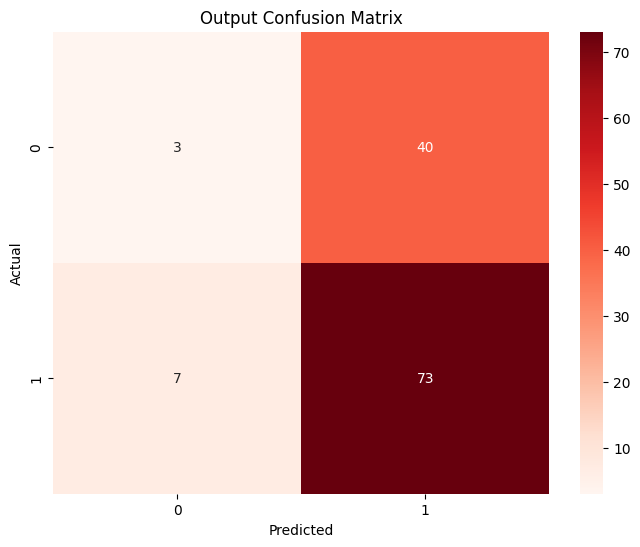

In [615]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_val,y_pred)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

# **Applying Some other classifiers and Comparing their performances**

In [616]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [617]:
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}


In [618]:
accuracies = {}
confusion_matrices = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies[name] = accuracy
    confusion_matrices[name] = confusion_matrix(y_val, y_pred)


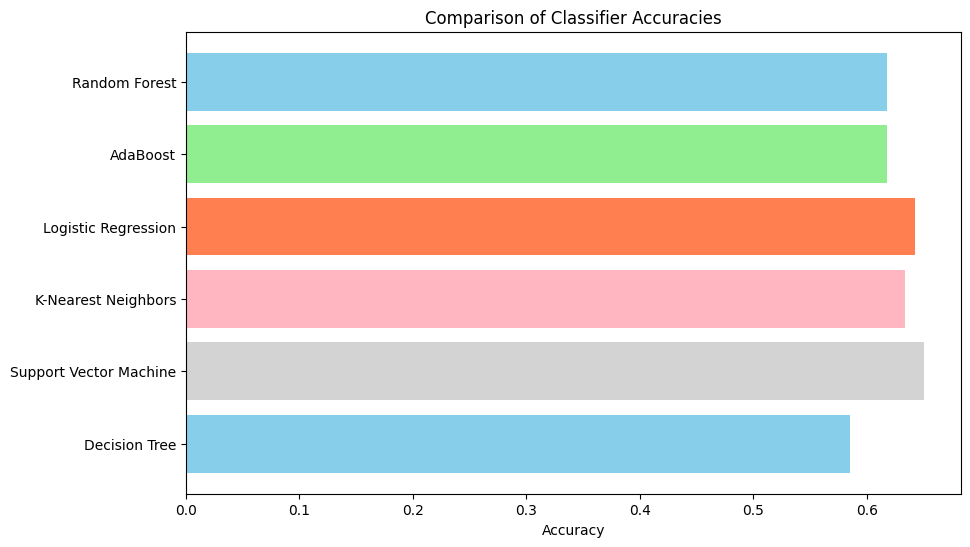

In [619]:
# Defining a list of colors for each bar
colors = ['skyblue', 'lightgreen', 'coral', 'lightpink', 'lightgrey']
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color=colors)
plt.xlabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.gca().invert_yaxis()  # Inverting the y-axis to show the highest accuracy at the top
plt.show()


Confusion Matrix for Random Forest:
[[ 3 40]
 [ 7 73]]



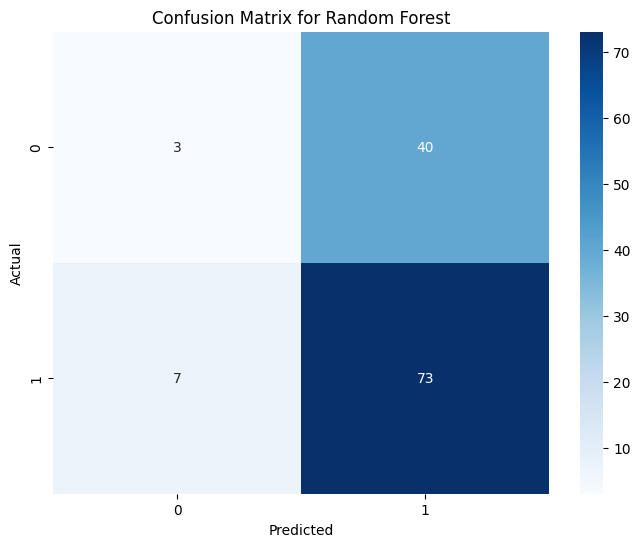

Confusion Matrix for AdaBoost:
[[ 5 38]
 [ 9 71]]



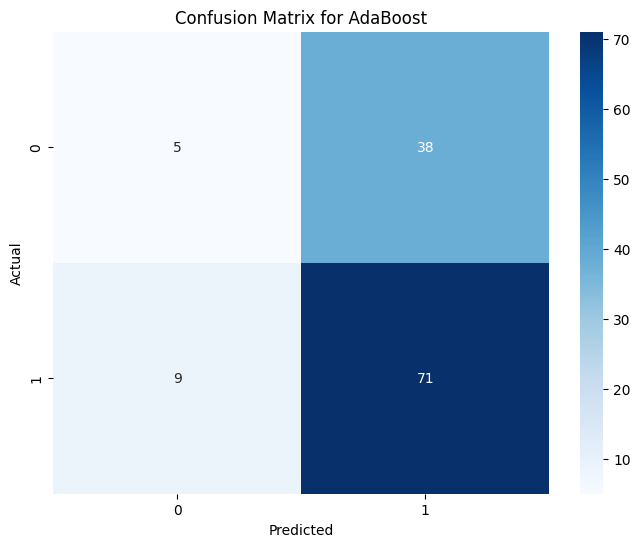

Confusion Matrix for Logistic Regression:
[[ 1 42]
 [ 2 78]]



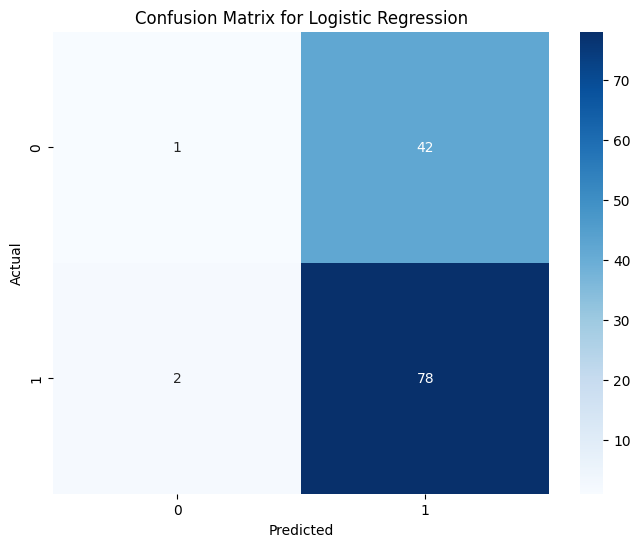

Confusion Matrix for K-Nearest Neighbors:
[[ 6 37]
 [ 8 72]]



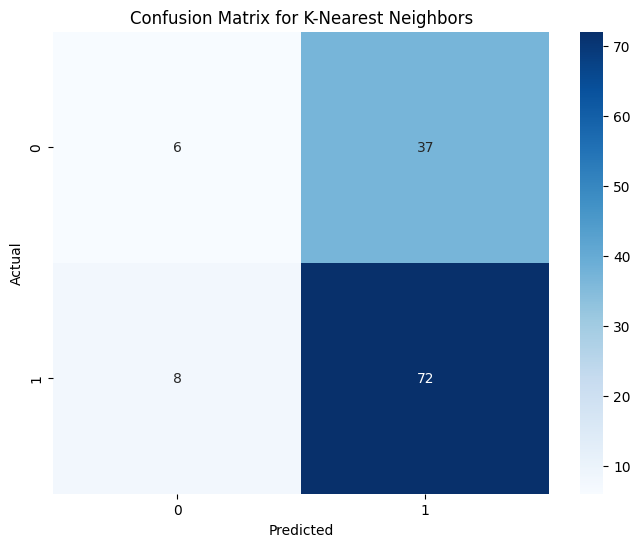

Confusion Matrix for Support Vector Machine:
[[ 0 43]
 [ 0 80]]



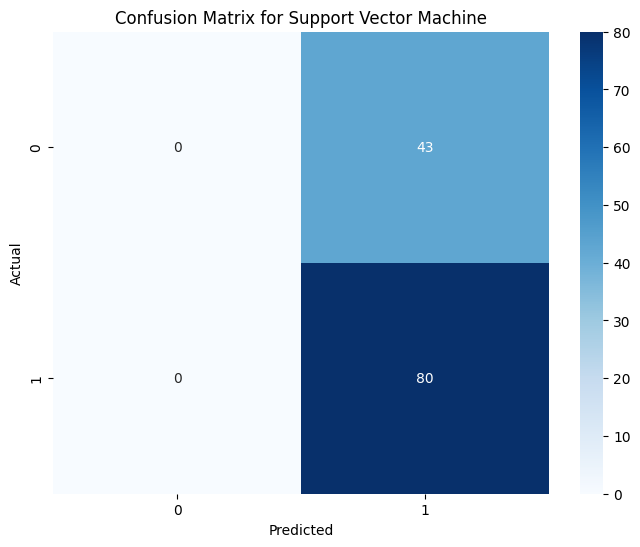

Confusion Matrix for Decision Tree:
[[15 28]
 [23 57]]



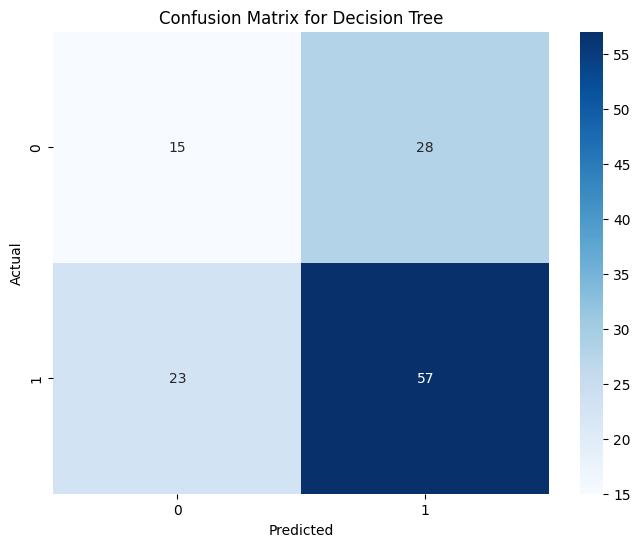

Accuracies:
Random Forest: 0.6178861788617886
AdaBoost: 0.6178861788617886
Logistic Regression: 0.6422764227642277
K-Nearest Neighbors: 0.6341463414634146
Support Vector Machine: 0.6504065040650406
Decision Tree: 0.5853658536585366


In [620]:
# Printing confusion matrices for each classifier
for name, cm in confusion_matrices.items():
    print(f"Confusion Matrix for {name}:")
    print(cm)
    print()

    # Ploting confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Printing accuracies
print("Accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy}")

## **Predictions on the Test Data**

In [621]:
X_test = test.drop(columns=['Loan_ID'])
# Predicting on the test data
test_predictions = model.predict(X_test)

# Creating a DataFrame with the predictions
test_results = pd.DataFrame({
    'Loan_ID': test['Loan_ID'],
    'Loan_Status': test_predictions
})

test_results.head()

,Loan_ID,Loan_Status
0,LP001015,1.0
1,LP001022,0.0
2,LP001031,0.0
3,LP001035,1.0
4,LP001051,0.0


## **Using GridSearchCV for Hyperparameter tuning**

Best parameters for Logistic Regression: {'C': 0.01}
Best parameters for Random Forest: {'max_depth': 30, 'n_estimators': 200}
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'n_estimators': 50}
Confusion Matrix for Logistic Regression:
[[15 28]
 [23 57]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.39      0.35      0.37        43
         1.0       0.67      0.71      0.69        80

    accuracy                           0.59       123
   macro avg       0.53      0.53      0.53       123
weighted avg       0.57      0.59      0.58       123




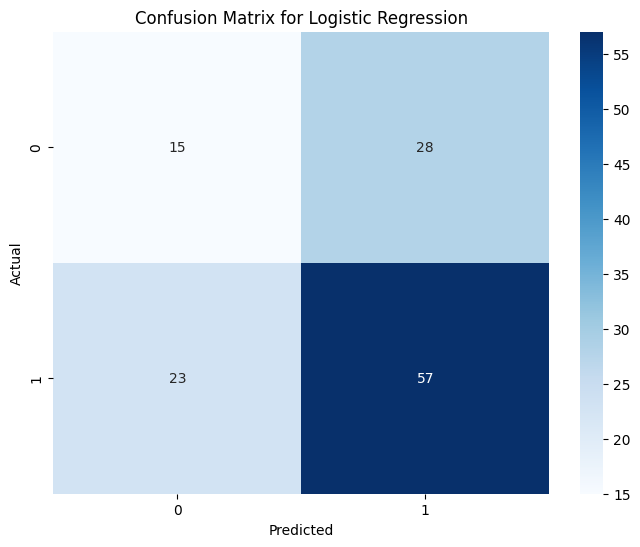

Confusion Matrix for Random Forest:
[[15 28]
 [23 57]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.39      0.35      0.37        43
         1.0       0.67      0.71      0.69        80

    accuracy                           0.59       123
   macro avg       0.53      0.53      0.53       123
weighted avg       0.57      0.59      0.58       123




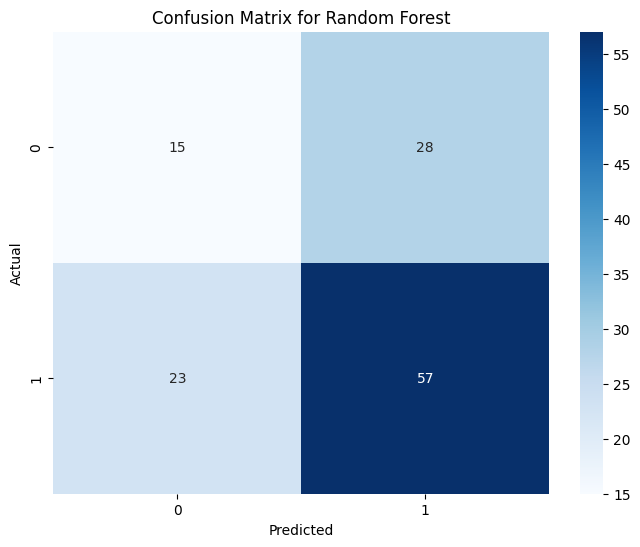

Confusion Matrix for Gradient Boosting:
[[15 28]
 [23 57]]

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.39      0.35      0.37        43
         1.0       0.67      0.71      0.69        80

    accuracy                           0.59       123
   macro avg       0.53      0.53      0.53       123
weighted avg       0.57      0.59      0.58       123




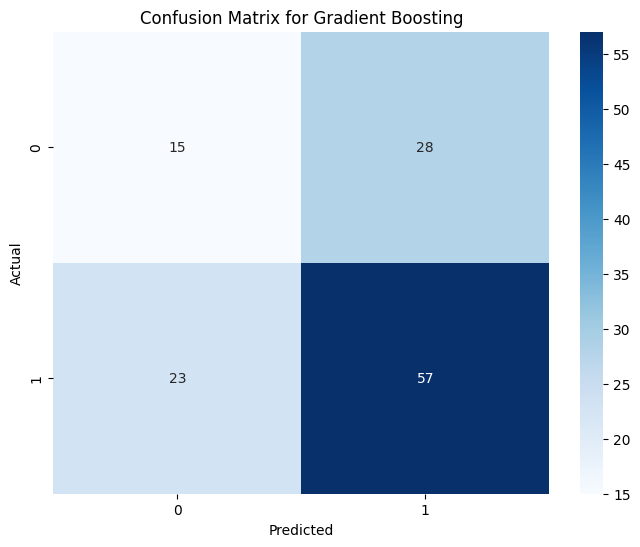

In [622]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# Defining classifiers and parameter grids
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'Gradient Boosting': {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}
}

best_estimators = {}
for name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Evaluating the best models
for name, model in best_estimators.items():
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    print(f"Confusion Matrix for {name}:")
    print(cm)
    print()

    print(f"Classification Report for {name}:")
    print(report)
    print()

    # Plotting confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
